In [2]:
from google.colab import files
uploaded =files.upload()

Saving Ice Cream.csv to Ice Cream.csv


In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

In [46]:
df = pd.read_csv('Ice Cream.csv')

In [47]:
print("First 5 rows:\n", df.head())


First 5 rows:
    Temperature  Revenue
0         24.6      535
1         26.1      626
2         27.8      661
3         20.6      488
4         11.6      317


In [48]:
 print("\nDisplay statistics:\n", df.describe())


Display statistics:
        Temperature      Revenue
count   500.000000   500.000000
mean     22.281600   522.058000
std       8.097597   175.410399
min       0.000000    10.000000
25%      17.175000   406.000000
50%      22.400000   530.000000
75%      27.800000   643.000000
max      45.000000  1000.000000


In [65]:
 print("\nMissing values:\n", df.isnull().sum())


Missing values:
 Temperature    0
Revenue        0
dtype: int64


In [50]:
df.dropna(inplace=True)

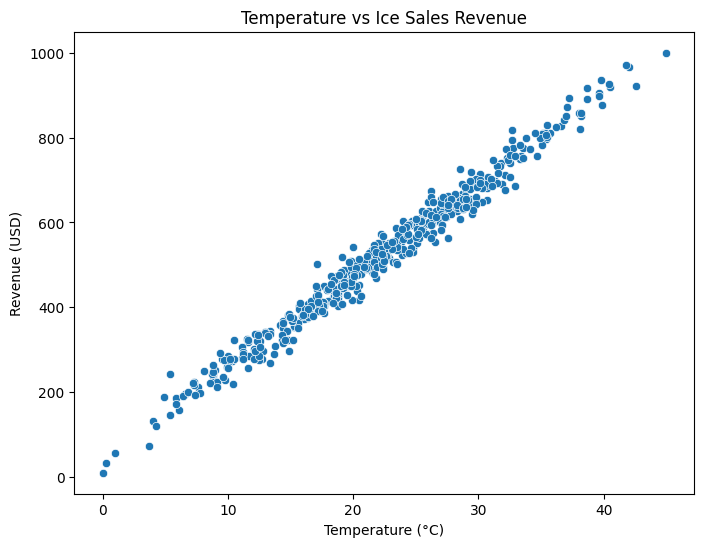

In [51]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Temperature', y='Revenue', data=df)
plt.title('Temperature vs Ice Sales Revenue')
plt.xlabel('Temperature (°C)')
plt.ylabel('Revenue (USD)')
plt.show()

In [52]:
X = df[['Temperature']]
y = df['Revenue']


In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [54]:

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [55]:
y_pred = model.predict(X_test)

In [61]:
rmse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [63]:
print(f"\nModel Evaluation:")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R² Score: {r2:.2f}")


Model Evaluation:
RMSE: 652.49
MAE: 19.20
R² Score: 0.98


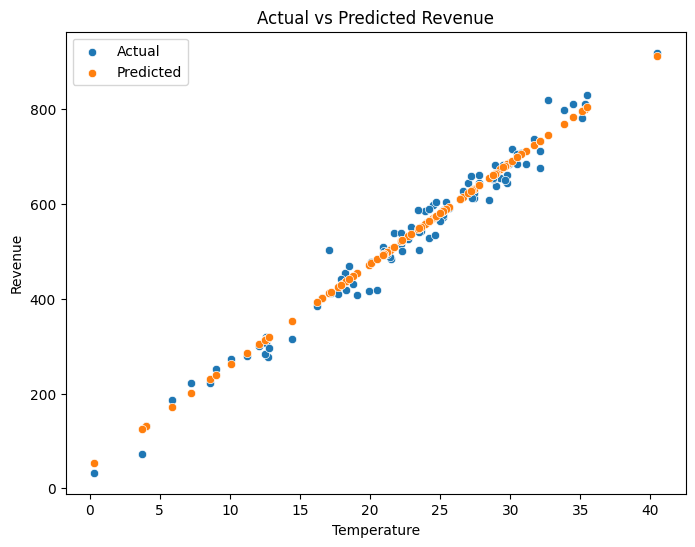

In [75]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_test['Temperature'], y=y_test, label='Actual')
sns.scatterplot(x=X_test['Temperature'], y=y_pred, label='Predicted')
plt.title('Actual vs Predicted Revenue')
plt.show()

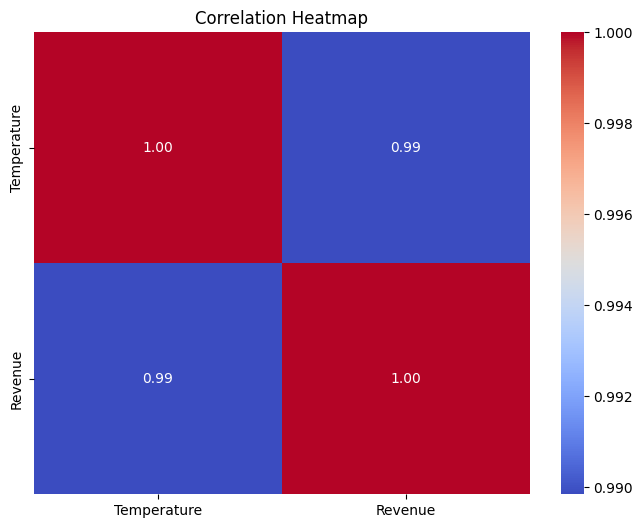

In [78]:
plt.figure(figsize=(8, 6))
correlation = df.corr(numeric_only=True)
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [79]:

results = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
print(results.head(10))


   Actual   Predicted
0     660  683.421568
1     624  632.099966
2     560  559.394363
3     498  499.519161
4     628  614.992765
5     301  304.924755
6     279  285.679154
7     320  315.616755
8     484  505.934362
9     684  685.559968
